## Gradient Descent Function

In [1]:
import numpy as np
from numpy import cos, sin, pi, exp

def f(x,y):
    return exp(-(x - y)**2)*sin(y)

def df(x,y):
    return np.array([-2*exp(-(x - y)**2)*sin(y)*(x - y) , exp(-(x - y)**2)*cos(y) + 2*exp(-(x - y)**2)*sin(y)*(x - y)])

def grad_descent(f,df,sp,lr,frames):
    cp=np.array(sp)
    for i in range (frames):
        grad=df(*cp)
        cp=cp-grad*lr
            
    return cp,f(*cp)

sp=[0,0]
lr=0.1
frames=50000
min_p,min_v=grad_descent(f,df,sp,lr,frames)
min_p=list(min_p)
print(min_p)
print(min_v)

[-1.5707963267948943, -1.5707963267948948]
-1.0


### Explaination

The code defines a function called **grad_descent** which performs gradient descent optimization on a given function **f** and its derivatives **df** starting from a given initial point **sp**, with a given learning rate **lr** and a specified number of iterations **frames**. The function iteratively updates the current point **cp** by subtracting the product of the gradient and the learning rate. Finally, it returns the optimal point **min_p** and its value **min_v** achieved by the function **f** at that point.

## Problem 1 - 1-D simple polynomial

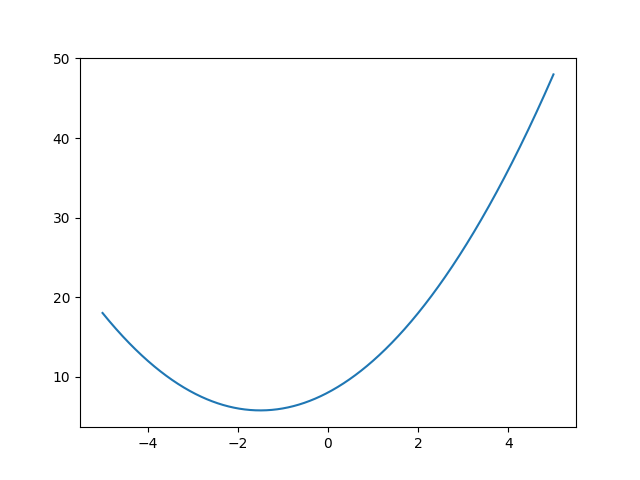

In [7]:
%matplotlib ipympl
import numpy as np
from numpy import cos, sin, pi, exp 
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def f1(x):
    return x ** 2 + 3 * x + 8
def gradient(x):
    return 2*x + 3

sp=5
lr=0.01
ybest=10000000
xbase = np.linspace(-5, 5, 1000)
ybase = f1(xbase)
fig, ax = plt.subplots()
ax.plot(xbase, ybase)
xall, yall = [], []
lnall, = ax.plot([], [], 'ro')
lngood, = ax.plot([], [], 'go', markersize=10)

def onestepderiv(frame):
    global ybest, sp, lr
    x = sp - gradient(sp) * lr 
    sp = x
    y = f1(x)
    lngood.set_data(x, y)
    xall.append(x)
    yall.append(y)
    lnall.set_data(xall, yall)
    if y < ybest:
        ybest = y

ani= FuncAnimation(fig, onestepderiv, frames=range(500), interval=100, repeat=False)
plt.show()

In [8]:
print(ybest)
print(sp)

5.750000068289598
-1.4997386772146237


### Explaination

This code is a simple implementation of gradient descent algorithm in Python. It defines a function *f1(x)* and its derivative function *gradient(x)*, which are used to compute the gradients of the function at different points. The main part of the code is the onestepderiv function, which computes a single step of gradient descent. It starts with an initial point *sp*, computes the gradient at that point, and moves to a new point *sp - gradient(sp) * lr*, where lr is the learning rate. The process is repeated for a fixed number of frames, and the results are plotted using the matplotlib library. The animation shows how the algorithm updates the position of the point in each step, and how it approaches the minimum of the function. The code can be used to optimize any differentiable function.

## Problem 2 - 2-D polynomial

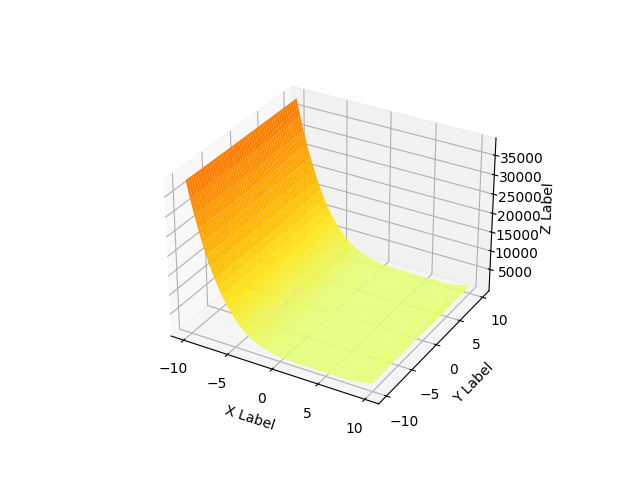

In [1]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

xlim3 = [-10, 10]
ylim3 = [-10, 10]

def f3(x, y):
    return x**4 - 16*x**3 + 96*x**2 - 256*x + y**2 - 4*y + 262

def df3_dx(x, y):
    return 4*x**3 - 48*x**2 + 192*x - 256

def df3_dy(x, y):
    return 2*y - 4

z_best = 10000000
sp_x = 10
sp_y = 10
lr1 = 0.001
lr2=0.01

x = np.linspace(-10, 10, 1000)
y = np.linspace(-10, 10, 1000)
X, Y = np.meshgrid(x, y)
Z = f3(X, Y)

fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot_surface(X, Y, Z,cmap='Wistia')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

x_all, y_all, z_all = [], [], []
ln_all, = ax.plot([], [], [], 'ro')
ln_good, = ax.plot([], [], [], 'go', markersize=10)

def onestepderiv(frame):
    global z_best, sp_x, sp_y, lr1,lr2
    x = sp_x - df3_dx(sp_x, sp_y) * lr1
    y = sp_y - df3_dy(sp_x, sp_y) * lr2
    sp_x, sp_y = x, y
    z = f3(x, y)
    ln_good.set_data([x],[y])
    ln_good.set_3d_properties([z])
    x_all.append(x)
    y_all.append(y)
    z_all.append(z)
    ln_all.set_data(x_all, y_all)
    ln_all.set_3d_properties(z_all)
    if z < z_best:
        z_best = z

ani = FuncAnimation(fig, onestepderiv, frames=range(5000), interval=10, repeat=False)
plt.show()

In [2]:
print(f"{z_best}  {sp_x}    {sp_y}")

2.00062249851203  4.1579554370043015    2.0000000000000107


### Explaination

The provided code implements gradient descent optimization on a 3D function represented by the equation *f3(x,y)*. The function has a global minimum, which the algorithm seeks to find by iteratively updating the *x* and *y* values using the partial derivatives of the function. The learning rate (*lr1* and *lr2*) determines the step size of each update, while the maximum number of iterations is set to **5000**. The animation produced by the code shows the path of the algorithm as it descends towards the minimum, represented by a green dot. The red dots represent the intermediate points visited by the algorithm during its descent. The code can be used to optimize any 3D function, provided that the function and its partial derivatives are defined within the code.

## Problem 3 - 2-D function 

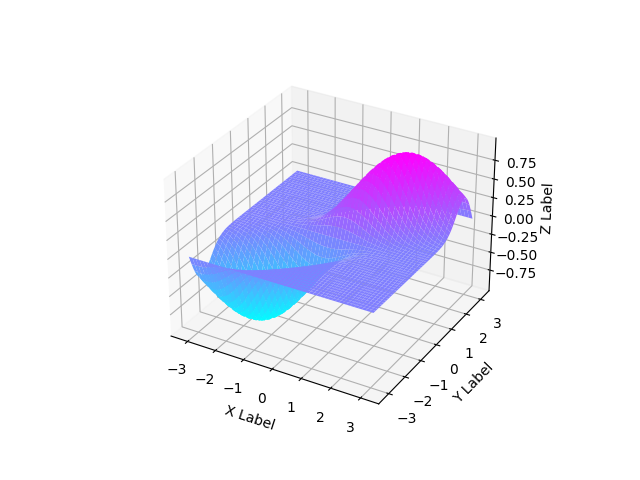

In [3]:
%matplotlib ipympl
import numpy as np
from numpy import cos, sin, pi, exp 
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


xlim4 = [-pi, pi]
def f4(x,y):
    return exp(-(x - y)**2)*sin(y)

def f4_dx(x, y):
    return -2*exp(-(x - y)**2)*sin(y)*(x - y)

def f4_dy(x, y):
    return exp(-(x - y)**2)*cos(y) + 2*exp(-(x - y)**2)*sin(y)*(x - y)

z_best = 10000000
sp_x = 0
sp_y = 0
lr1 = 0.1
lr2=0.1

x = np.linspace(-pi, pi, 10000)
y = np.linspace(-pi, pi, 10000)
X, Y = np.meshgrid(x, y)
Z = f4(X, Y)

fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot_surface(X, Y, Z,cmap='cool')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

x_all, y_all, z_all = [], [], []
# xb,yb,zb = [],[],[]
ln_all, = ax.plot([], [], [], 'ro')
ln_good, = ax.plot([], [], [], 'go', markersize=10)

def onestepderiv(frame):
    global z_best, sp_x, sp_y, lr1,lr2
    x = sp_x - f4_dx(sp_x, sp_y) * lr1
    y = sp_y - f4_dy(sp_x, sp_y) * lr2
    sp_x, sp_y = x, y
    z = f4(x, y)
    ln_good.set_data([x],[y])
    ln_good.set_3d_properties([z])
    x_all.append(x)
    y_all.append(y)
    z_all.append(z)
    ln_all.set_data(x_all, y_all)
    ln_all.set_3d_properties(z_all)
    if z < z_best:
        z_best = z

ani = FuncAnimation(fig, onestepderiv, frames=range(5000), interval=10, repeat=False)
plt.show()

In [4]:
print(f"{z_best}  {sp_x}    {sp_y}")

-1.0  -1.5707963267948943    -1.5707963267948948


### Explaination
The code was similar to the problem 3 code. Just the limits,starting point and learning rate was changed.

## Problem 4 - 1-D trigonometric

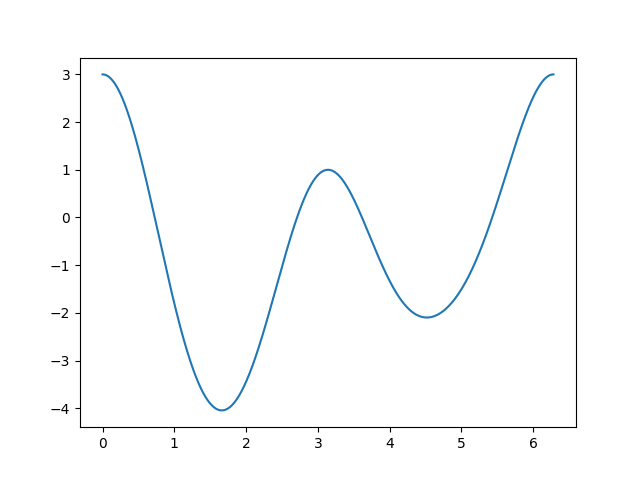

In [9]:
%matplotlib ipympl
import numpy as np
from numpy import cos, sin, pi, exp 
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


def f5(x):
    return cos(x)**4 - sin(x)**3 - 4*sin(x)**2 + cos(x) + 1

def f5_dx(x):
    return -sin(x)*(4*cos(x)**2 + 3*sin(x)*cos(x)**2 + 8*cos(x) + 1)

sp=0.5
lr=0.01
ybest=10000000
xbase = np.linspace(0, 2*pi, 1000)
ybase = f5(xbase)
fig, ax = plt.subplots()
ax.plot(xbase, ybase)
xall, yall = [], []
lnall, = ax.plot([], [], 'ro')
lngood, = ax.plot([], [], 'go', markersize=10)

def onestepderiv(frame):
    global ybest, sp, lr
    x = sp - f5_dx(sp) * lr 
    sp = x
    y = f5(x)
    lngood.set_data([x], [y])
    xall.append(x)
    yall.append(y)
    lnall.set_data(xall, yall)
    if y < ybest:
        ybest = y

ani= FuncAnimation(fig, onestepderiv, frames=range(500), interval=100, repeat=False)
plt.show()

In [10]:
print(ybest)
print(sp)

-4.04540392360551
1.7140384741300485


### Explaination
The code is just as similar to any 1-D problem (same as problem 1). The limits,starting point and learning rate was changed.